<a href="https://colab.research.google.com/github/obengdouglas/UTD-BUAN6341_AppliedML/blob/main/BUAN_6341_NLP_Project_Analysis_of_conflicts_in_West_Africa_2021_using_ACLED_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of Crisis Events in West Africa 2023 using ACLED data
===========================================================

<h3>University of Texas at Dallas - MS Business Analytics </h3>
<h3>BUAN 6341.501 - Applied Machine Learning - S23 </h3>
<h3>Individual project: Natural Language Processing - Douglas Obeng</h3>
<center><img src='https://raw.githubusercontent.com/obengdouglas/UTD-BUAN6341_AppliedML/main/Project_NLP/Adinkra_Peace.jpeg' width="669" height="395" alt="Image of iris flower"></center>



Notebook submitted for final individual project of the Applied Machine Learning Course at The University of Texas at Dallas, Spring 2023

In this project, data science and machine learning is used to analyze the locations, players and other information on conflicts in West Africa for the first 4months of 2023.

The goal is that, by understanding these factors, we would be better able to work for a more peaceful and harmonious society.


#####The image shown is an Adinkra symbol from Ghana in West Africa. It is called "obi nka obi" and stands for peace and harmony amongst peoples.

0. Outline
1. Introduction
2. Objectives
3. Import Libraries
4. Read and Manipulate Data
#####4.1 Lowercase variables
5. Exploratory Data Analysis (EDA)
#####5.1 Countries with the Highest number of Conflicts
#####5.2 Countries with the highest Number of Fatalities
#####5.3 Fatality per event rate
#####5.4 Map of West Africa: Conflicts per country
#####5.5. Causes of Conflicts in West Africa
#####5.6 Most Popular News Sources in 2021
#####5.7 Conflicts Between Actors
#####5.8 Month vs. Weekday Fatalities Distribution
6. NLP
#####6.1 Cleaning the notes column and removing stopwords
#####6.2 WordCloud of most used Words by the News Report Agencies
#####6.3 Vader sentiment score and compound
#####6.4 Tokenization
#####6.5 Lemmatization
#####6.6 Vectorization
#####6.7 Logistic Regression
7. Conclusion

## **1. Introduction**

This project is my submission for the Natural Language Processing (NLP) project of the Applied Machine Learning course at University of Texas at Dallas 2023 Spring. For this project, I used open-source data from the Armed Conflict Location & Event Data Project (ACLED).

Armed Conflict Location & Event Data Project (ACLED) is a disaggregated conflict collection, analysis and crisis mapping project. ACLED’s aim is to capture the forms, actors, dates and locations of political violence and protest as it occurs across states. The ACLED team conducts analysis to describe, explore and test conflict scenarios, and makes both data and analysis open to freely use by the public.

This has Conflicts data from 2015 to the present. ACLED collects the dates, actors, types of violence, locations, and fatalities of all reported political violence and protest events across Africa, South Asia, South East Asia and the Middle East. Political violence and protest includes events that occur within civil wars and periods of instability, public protest and regime breakdown.

This project focuses on West Africa for the year 2023. West Africa has 16 countries, 10 of which are french speaking.



**Reference:**
Data from Armed Conflict Location & Event Data Project (ACLED). (2023). ACLED Data Export [West Africa, January 1, 2023 - April 30, 2023]. Retrieved from https://acleddata.com

## **2. Objectives**

The objectives of the project are:
- Analysis of the crisis events in W/A for 2023 with particular emphasis on event types and fatalities in this notebook (using plotly)
- Apply NLP methods including cleaning, lemmatization and vectorization
- Create a word cloud to view the most common words
- Use vader_lexicon to predict the sentiment score and compound
- Use of logistic regression model to predict type of conflict (event_type) based on the news for the event (notes) 

## **3. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
from IPython.display import Image
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.tools as tls
import warnings
from wordcloud import WordCloud
import os
from transformers import pipeline #Retrieve pipeline of modules 
import csv
from tqdm import tqdm
import time
from datetime import timedelta
import plotly.io as pio #uncomment if working in colab
pio.renderers.default = "colab" #uncomment if working in colab
import sklearn
import spacy
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")
     
%matplotlib inline

## **4. Data from ACLED**

One specification of this project is that the data should be live. Therefore, rather than download the data, I use a get request to obtain the data from the ACLED website through an api and with the appropriate parameters. this should ensure that the data is always live when run.

Please note the following:
- ACLED requires a username and key for data access. I have provided my in the code. In case of any issue, please creat a new one at https://developer.acleddata.com/
- After creating the dataframe live from ACLED's website, I save the dataframe as csv in github and have provided the link as an alternative in case there is an issue with the api. I also include the csv data with this project. This is not directly used in the project but might be helpful.

**Description of data attricutes**
1. event_id_cnty (string) - An	individual	identifier	by	number	and country	acronym
2. event_date (date) - The date the event occurred in the format: yyyy-mm-dd
3. year (int) - The year the event occurred.
4. time_precision (int) - A	numeric	code	indicating	the	level	of certainty	of	the	date	coded	for	the	event
5. disorder_type (string) - Type of disorder
6. event_type (string) - The type of conflict event
7. sub_event_type (string) - The type of conflict sub event
8. actor1 (string) - The	named	actor	involved	in	the	event
9. assoc_actor_1 (string) - The	named	actor	allied	with	or	identifying	ACTOR1
10. inter1 (int) - A	numeric	code	indicating	the	type	of	ACTOR1.
11. actor2 (string) - The	named	actor	involved	in	the	event
12. assoc_actor_2 (string) - The	named	actor	allied	with	or	identifying	ACTOR2
13. inter2* (int) - A	numeric	code	indicating	the	type	of	ACTOR2.
14. interaction (int) - A	numeric	code	indicating	the	interaction	between	types	of	ACTOR1	and	ACTOR2
15. civilian_targeting (string) - Indicator	of	whether	the	event	targeted	civilians
16. iso (int) - A	numeric	code	for	each	individual	country.
17. region (string) - The	region	in	which	the	event	took	place
18. country (string) - The name of the country the event occurred in
19. admin1 (string) - The	largest	sub-national	administrative	region	in	which	the	event	took	place
20. admin2 (string) - The	second	largest	sub-national	administrative	region	in	which	the	event	took	place
21. admin3 (string) - The	third	largest	sub-national	administrative	region	in	which	the	event	took	place
22. location (string) - The	location	in	which	the	event	took	place
23. latitude (float) - The	latitude	of	the	location
24. longitude (float) - The	longitude	of	the	location
25. geo_precision (int) - A	numeric	code	indicating	the	level	of	certainty	of	the	location	coded	for	the	event
26. source (string) - The	source	of	the	event	report
27. source_scale (string) - The	scale	of	the	source
28. notes (string) - A	short	description	of	the	event
29. fatalities (int) - The	number	of	reported	fatalities	which	occurred	during the	event
30. tags (string) - Tags	providing	additional	information	about	the	event
31. timestamp (int or date) - The	unix	timestamp	(or	date	stamp)	this	data	entry	was	last	updated

In [5]:
import requests

api_key = 'aqx0AyV8i8ym00aOShMW'
email = 'obengdouglas@gmail.com'
year = 2023
date_range = "2023-01-01|2023-04-31" #First 4months of 2023
region = 1 #1 is the numerical code for Western Africa

url = f"https://api.acleddata.com/acled/read?email={email}&key={api_key}&event_date={date_range}&region={region}"

# Make the GET request and store the response in a pandas dataframe called acled23
response = requests.get(url)
if response.status_code == 200:
    data = response.json()["data"]
    acled23 = pd.DataFrame(data)
else:
    print(f"Error retrieving data: {response.text}")

#Alternative code for reading data saved on github
#acled23 = pd.read_csv('https://raw.githubusercontent.com/obengdouglas/UTD-BUAN6341_AppliedML/main/Project_NLP/acled23_westafrica.csv', sep=",", nrows = 8837, skip_blank_lines=True, na_filter=True)


In [8]:
acled23.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,BFO9727,2023-04-28,2023,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Burkina Faso (2022-),NaN,1,...,Kossouka,13.3714,-1.8983,2,RTB,National,"On 28 April 2023, the Burkinabe air force carr...",3,NaN,1683041275
1,BFO9728,2023-04-28,2023,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Burkina Faso (2022-),NaN,1,...,Ougarou,12.1580,0.9310,2,RTB,National,"On 28 April 2023, the Burkinabe air force carr...",3,NaN,1683041275
2,BFO9743,2023-04-28,2023,1,Political violence,Violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,2,...,Koare,11.9429,0.2980,1,Whatsapp,New media,"On 28 April 2023, presumed JNIM militants atta...",3,NaN,1683041275
3,MAA1590,2023-04-28,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Mauritania),Labor Group (Mauritania),6,...,Nouakchott,18.0801,-15.9777,1,Cridem,National,"On 28 April 2023, for a second consecutive day...",0,crowd size=dozens,1683041275
4,MLI30031,2023-04-28,2023,1,Political violence,Riots,Mob violence,Rioters (Mali),Taxi Drivers (Mali),5,...,Sikasso,11.3164,-5.6777,1,Studio Tamani,National,"On 28 April 2023, a number of residents and mo...",0,crowd size=no report,1683041275


In [9]:
acled23.info()
#there are a total of 3885 rows/recorded events in the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       3885 non-null   object 
 1   event_date          3885 non-null   object 
 2   year                3885 non-null   int64  
 3   time_precision      3885 non-null   int64  
 4   disorder_type       3885 non-null   object 
 5   event_type          3885 non-null   object 
 6   sub_event_type      3885 non-null   object 
 7   actor1              3885 non-null   object 
 8   assoc_actor_1       907 non-null    object 
 9   inter1              3885 non-null   int64  
 10  actor2              3228 non-null   object 
 11  assoc_actor_2       1210 non-null   object 
 12  inter2              3885 non-null   int64  
 13  interaction         3885 non-null   int64  
 14  civilian_targeting  1441 non-null   object 
 15  iso                 3885 non-null   int64  
 16  region

In [10]:
#the api returns the data in json format with all variables as string objects.  Convert the variables to approprate types.
#event_date will be changed to date in a later cell
acled23['iso'] = acled23['iso'].astype(int)
acled23['year'] = acled23['year'].astype(int)
acled23['time_precision'] = acled23['time_precision'].astype(int)
acled23['inter1'] = acled23['inter1'].astype(int)
acled23['inter2'] = acled23['inter2'].astype(int)
acled23['interaction'] = acled23['interaction'].astype(int)
acled23['latitude'] = acled23['latitude'].astype(float)
acled23['longitude'] = acled23['longitude'].astype(float)
acled23['geo_precision'] = acled23['geo_precision'].astype(int)
acled23['fatalities'] = acled23['fatalities'].astype(int)
acled23['timestamp'] = acled23['timestamp'].astype(int)

acled23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3885 entries, 0 to 3884
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       3885 non-null   object 
 1   event_date          3885 non-null   object 
 2   year                3885 non-null   int64  
 3   time_precision      3885 non-null   int64  
 4   disorder_type       3885 non-null   object 
 5   event_type          3885 non-null   object 
 6   sub_event_type      3885 non-null   object 
 7   actor1              3885 non-null   object 
 8   assoc_actor_1       907 non-null    object 
 9   inter1              3885 non-null   int64  
 10  actor2              3228 non-null   object 
 11  assoc_actor_2       1210 non-null   object 
 12  inter2              3885 non-null   int64  
 13  interaction         3885 non-null   int64  
 14  civilian_targeting  1441 non-null   object 
 15  iso                 3885 non-null   int64  
 16  region

In [11]:
# Size of dataset
print("Dataset size:", len(acled23))

Dataset size: 3885


In [12]:
# Checking for nulls

acled23.isnull().sum()

#There are no nulls

event_id_cnty            0
event_date               0
year                     0
time_precision           0
disorder_type            0
event_type               0
sub_event_type           0
actor1                   0
assoc_actor_1         2978
inter1                   0
actor2                 657
assoc_actor_2         2675
inter2                   0
interaction              0
civilian_targeting    2444
iso                      0
region                   0
country                  0
admin1                   0
admin2                   0
admin3                1758
location                 0
latitude                 0
longitude                0
geo_precision            0
source                   0
source_scale             0
notes                    0
fatalities               0
tags                  2979
timestamp                0
dtype: int64

In [13]:
#Checking for duplicates

acled23.duplicated().sum()

#there are no duplicates

0

In [14]:
# All looks well; save dataframe as csv file. A copy will be included with this project and another copy saved on github
acled23.to_csv('acled23_westafrica.csv', index=False)

### 4.1  Lowercase headers

In [15]:
# Lowercase all the column name
acled23.rename(str.lower, axis = 'columns', inplace = True)
# checking for null Values in percent
round((acled23.isnull().sum()/acled23.shape[0])*100,2)

event_id_cnty          0.00
event_date             0.00
year                   0.00
time_precision         0.00
disorder_type          0.00
event_type             0.00
sub_event_type         0.00
actor1                 0.00
assoc_actor_1         76.65
inter1                 0.00
actor2                16.91
assoc_actor_2         68.85
inter2                 0.00
interaction            0.00
civilian_targeting    62.91
iso                    0.00
region                 0.00
country                0.00
admin1                 0.00
admin2                 0.00
admin3                45.25
location               0.00
latitude               0.00
longitude              0.00
geo_precision          0.00
source                 0.00
source_scale           0.00
notes                  0.00
fatalities             0.00
tags                  76.68
timestamp              0.00
dtype: float64

## **5. Exploratory Data Analysis (EDA)**

### 5.1 Countries with the Highest number of Conflicts

In [16]:

#change a long country name to an alias

acled23.country.value_counts().head()
data_1 = acled23.country.value_counts().sort_values(ascending=False)
x=data_1.index
y= data_1.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Numbers of Conflicts'),
    
    xaxis = dict (
    title = 'Country'),
    
    title = 'Top 10 Countries with Highest Conflicts'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: The top 3 crisis events countries are Nigeria, Burkina Faso and Mali accounting for 38%, 22% and 18% respectively of all events in West Africa. Together, they account for 78% of all crisis events.

### 5.2 Countries with the highest Number of Fatalities

In [17]:
data_2 = acled23.groupby('country')['fatalities'].sum().sort_values(ascending=False)
x=data_2.index
y= data_2.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':18,'color':'blue'},
    marker=dict(
    color='darkred'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    
    xaxis = dict (
    title = 'Countries Name'),
    
    title = 'Countries with Highest Fatalities'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: The top 3 crisis countries for fatalities are Nigeria, Burkina Faso and Mali accounting for 37%, 41% and 16% respectively of all fatalities in West Africa. Together, they account for 94% of all fatalities.

### 5.3 Fatality per event rate 

In [18]:
data_3 = data_2.div(data_1).round(2)
data_3 = data_3.sort_values(ascending=False)

x=data_3.index
y= data_3.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':18,'color':'blue'},
    marker=dict(
    color='darkred'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    
    xaxis = dict (
    title = 'Country'),
    
    title = 'Fatalities per crisis event in West Africa, 2023'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)

## Analysis: 5 countries have >=1 fatality per event. these are Togo, Burkina faso, nigeria, Mali and Niger

### 5.4 Map of West Africa: Conflicts per country

In [19]:
rt2 = acled23.country.value_counts().sort_values(ascending=False)

data = [dict(
        type='choropleth',
        locations= rt2.index,
        locationmode='country names',
        z=rt2.values,
        text=rt2.index,
        colorscale='Reds',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title=' Countries with Conflicts'),),
        dict(
        type = 'scattergeo',
        locations = rt2.index,
        locationmode = 'country names',
        text = rt2.index,
        mode = 'text')        
]
layout = dict(title = 'Conflicts reported in Africa [2023]',
             geo = dict(
            scope='africa',
            showframe = True,
            showcoastlines = False,
            projection = dict(type='mercator'),
            center=dict(lon=-3.0, lat=16.77), # set Mali as center
            lonaxis=dict(range=[-35, 35]), # adjust longitude range
            lataxis=dict(range=[0, 25]), # adjust latitude range
            textposition="middle center", # set text position
            textfont=dict(size=12, color='white')
            )
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

## Analysis: The highest number of incidents is in Nigeria and this stretches over through Niger to Burkina faso and Mali. 

### 5.5. Causes of Conflicts in West Africa

In [20]:
# Lower all word in event_type
acled23.event_type = acled23.event_type.apply(lambda x: x.lower())
event_data = acled23.groupby('event_type').sum().reset_index()
# Create a new columns that count the numbers of counflicts 
d = dict(acled23.event_type.value_counts())
event_data['conflicts'] = event_data['event_type'].map(d)
# Sort the data by Fatalities
event_data.sort_values(by='fatalities', ascending=False,inplace=True)
#reduce the data to only 8 event type
event_data = event_data.head(8)

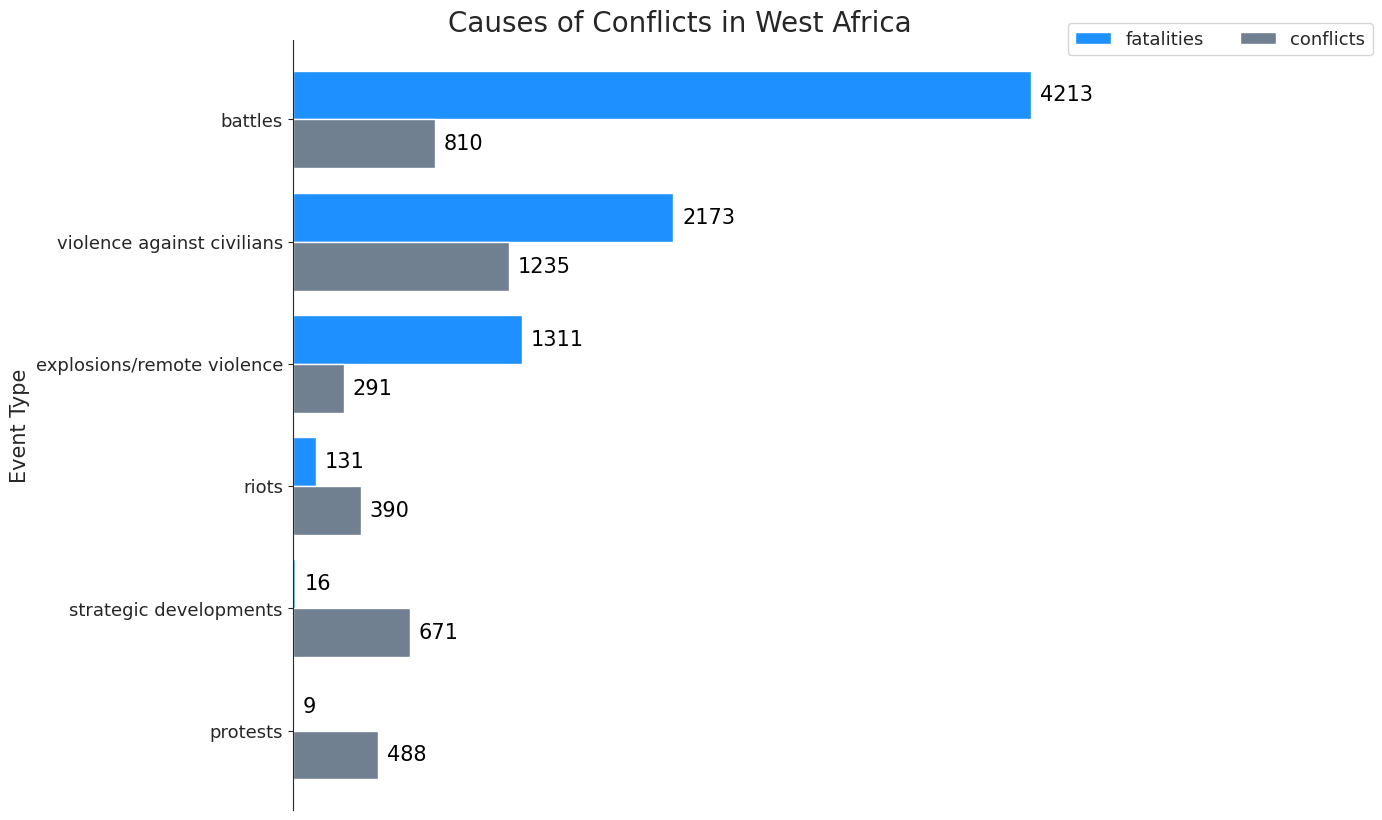

In [21]:
f, ax = plt.subplots(1,1,figsize = (10,10))
ax = event_data[['fatalities', 'conflicts']].plot(kind='barh',ax=ax,width=0.8,
              color=['dodgerblue', 'slategray'], fontsize=13);

ax.set_title("Causes of Conflicts in West Africa",fontsize=20)
ax.set_ylabel("Event Type", fontsize=15)

ax.set_yticklabels(event_data.event_type.values)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+50, i.get_y()+.25, \
            str(int(round(((i.get_width()))))), fontsize=15, color='black')

# invert for largest on top 
ax.invert_yaxis()
sns.despine(bottom=True)
x_axis = ax.axes.get_xaxis().set_visible(False) # turn off the y axis label
plt.legend(loc=(1.0,0.98),fontsize=13,ncol=2)
plt.show()


## Analysis: Battles, violence against civilians and explosions lead to the highest numbers of fatalities. Battles lead to a disproportionately high incidence of fatalities.

### 5.6 Most Popular News Sources in 2023

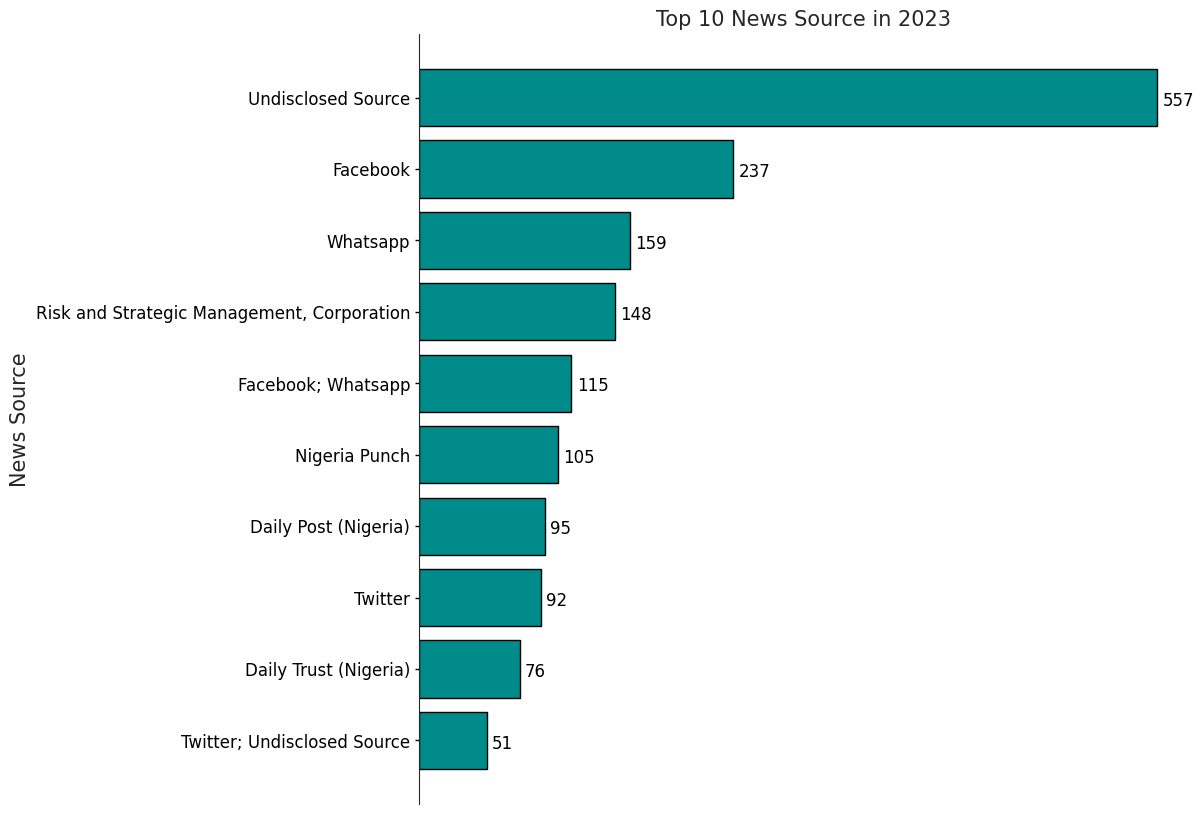

In [22]:
source_21 = acled23.source.value_counts().head(10)
f, ax = plt.subplots(1,1,figsize = (10,10))

ax.barh(source_21.index,source_21.values,color='DarkCyan',edgecolor='black')
ax.set_title("Top 10 News Source in 2023 ",
fontsize=15)

ax.set_ylabel("News Source", fontsize=15)
ax.tick_params(length=3, width=1, colors='black',labelsize='large',axis='y')
ax.set_yticklabels(source_21.index)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+4, i.get_y()+ 0.51, \
            str(round((i.get_width()),2)), fontsize=12, color='black')

# invert for largest on top 
ax.invert_yaxis()
sns.despine(bottom=True)
x_axis = ax.axes.get_xaxis().set_visible(False) # turn off the y axis label
plt.show()


## Analysis: The top news source belongs to undisclosed category. This is followed by Facebook and Whatsapp indicating the importance of social media in reporting incidents

### 5.7 Conflicts Between Actors 

In [23]:
actor = acled23.groupby(['actor1','actor2']).sum()['fatalities'].reset_index().sort_values('fatalities',ascending=False).head(20)


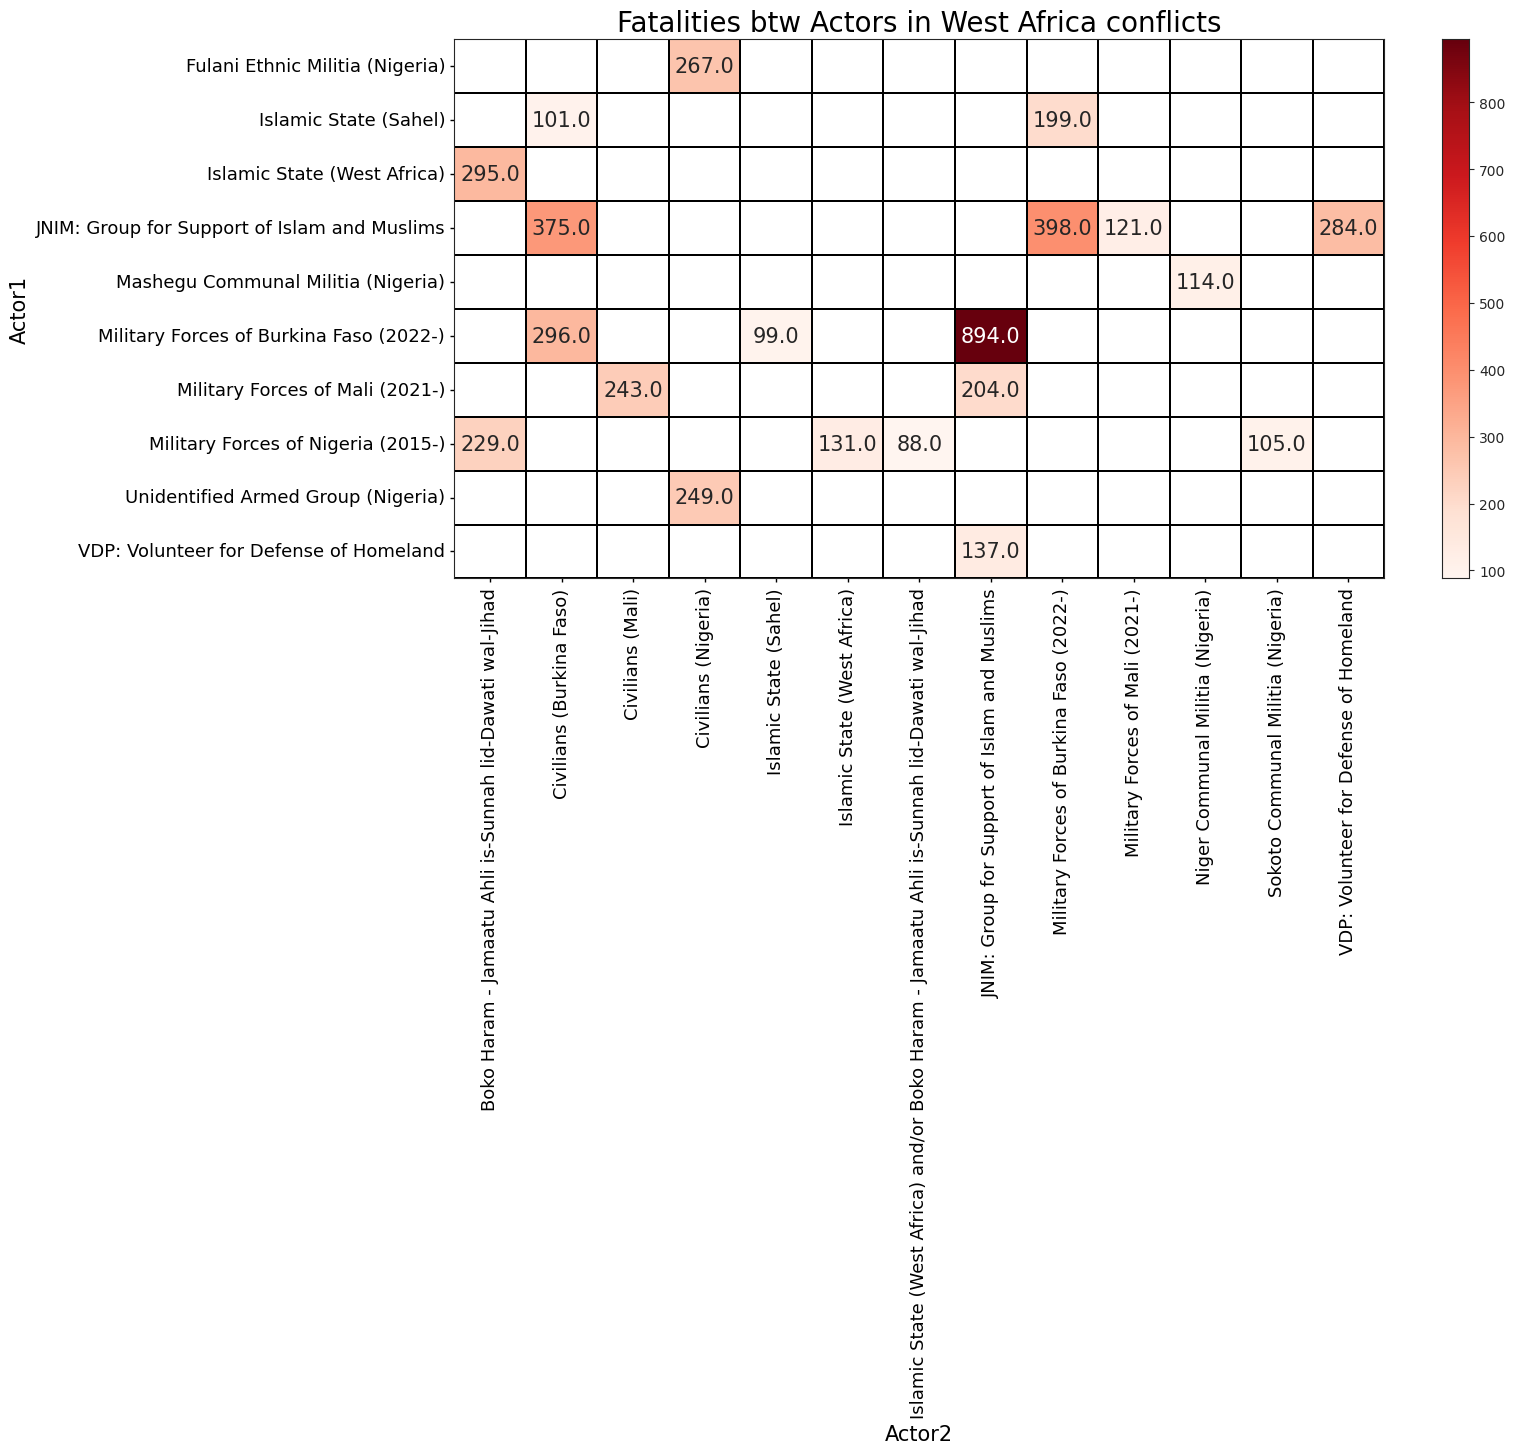

In [24]:
actors= actor.pivot_table(index='actor1',columns='actor2',values='fatalities',aggfunc='sum')

f, ax = plt.subplots(figsize=(15,7))

ax = sns.heatmap(actors, cmap='Reds',linecolor='black',linewidths=0.2,annot=True,fmt='.1f',annot_kws={'fontsize':15})

ax.tick_params(axis = 'y',length=3, width=1, colors='black',labelsize=13)
ax.tick_params(axis = 'x',length=3, width=1, colors='black',labelsize=13)
kwargs= {'fontsize':15, 'color':'black'}
ax.set_xlabel('Actor2',**kwargs)
ax.set_ylabel('Actor1',**kwargs)
ax.set_title('Fatalities btw Actors in West Africa conflicts',fontsize=20, color='black')
sns.despine(top=False,right = False)
plt.show()


## Analysis: Conflict between the military Forces of Burkina Faso and the JNIM militia lead in the number of fatalities

### 5.8 Month vs. Weekday Fatalities Distribution

Get Month, Day from datetime

In [25]:
# Convert Event date from a str to datetime format
acled23.event_date = pd.to_datetime(acled23.event_date)
#Let extract Month, and ,years
acled23['year_extract']= acled23['event_date'].apply(lambda x: x.year) #this will extract years from the event_date format
acled23['month']= acled23['event_date'].apply(lambda x: x.month) #this will extract Month from the event_date format
acled23['day of week']= acled23['event_date'].apply(lambda x: x.dayofweek)
dmonth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
         9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
acled23['month'] = acled23['month'].map(dmonth)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
acled23['day of week']= acled23['day of week'].map(dmap)
acled23.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,year_extract,month,day of week
0,BFO9727,2023-04-28,2023,1,Political violence,explosions/remote violence,Air/drone strike,Military Forces of Burkina Faso (2022-),NaN,1,...,2,RTB,National,"On 28 April 2023, the Burkinabe air force carr...",3,NaN,1683041275,2023,Apr,Fri
1,BFO9728,2023-04-28,2023,1,Political violence,explosions/remote violence,Air/drone strike,Military Forces of Burkina Faso (2022-),NaN,1,...,2,RTB,National,"On 28 April 2023, the Burkinabe air force carr...",3,NaN,1683041275,2023,Apr,Fri
2,BFO9743,2023-04-28,2023,1,Political violence,violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,2,...,1,Whatsapp,New media,"On 28 April 2023, presumed JNIM militants atta...",3,NaN,1683041275,2023,Apr,Fri
3,MAA1590,2023-04-28,2023,1,Demonstrations,protests,Peaceful protest,Protesters (Mauritania),Labor Group (Mauritania),6,...,1,Cridem,National,"On 28 April 2023, for a second consecutive day...",0,crowd size=dozens,1683041275,2023,Apr,Fri
4,MLI30031,2023-04-28,2023,1,Political violence,riots,Mob violence,Rioters (Mali),Taxi Drivers (Mali),5,...,1,Studio Tamani,National,"On 28 April 2023, a number of residents and mo...",0,crowd size=no report,1683041275,2023,Apr,Fri


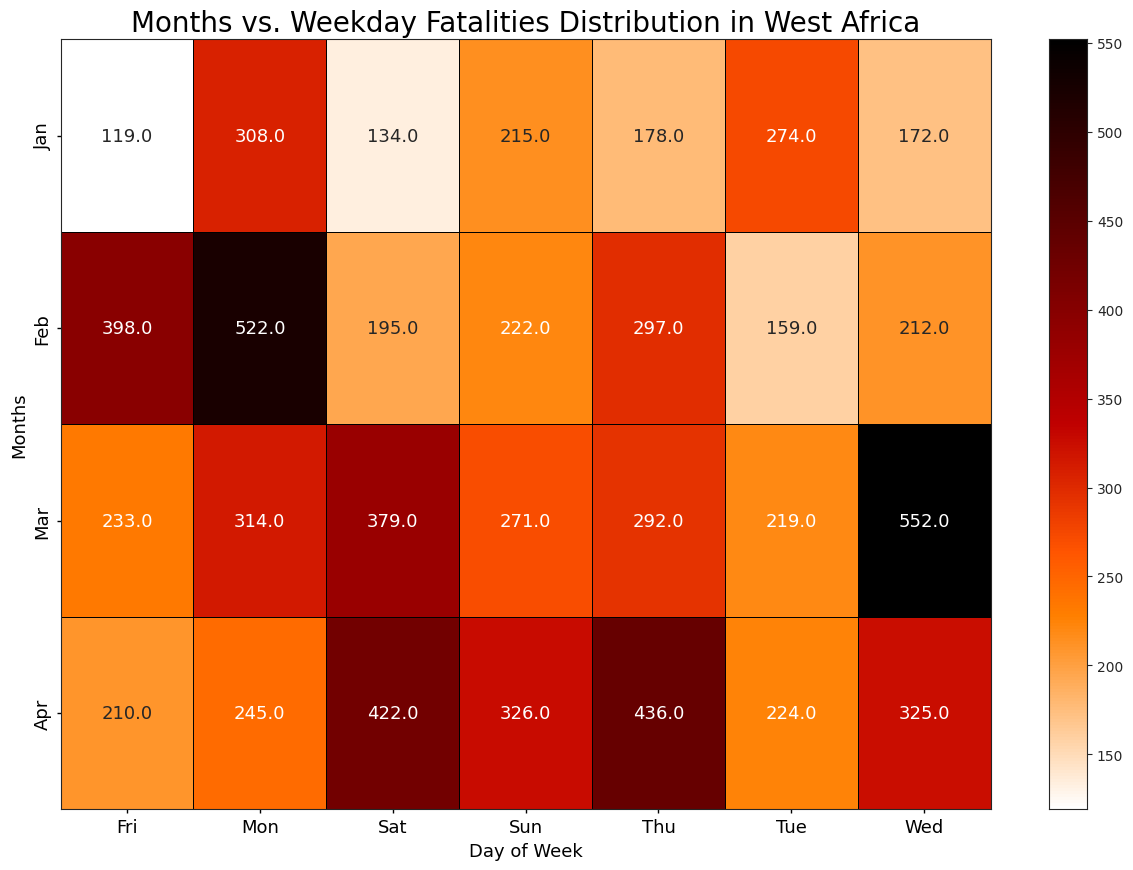

In [26]:
week_month_1= acled23.pivot_table(index='month',columns='day of week',values='fatalities',aggfunc='sum')
#Sorting the month Chronologically
week_month_1.index = pd.CategoricalIndex(week_month_1.index,
        categories= ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'])
week_month_1 = week_month_1.sort_index()
f, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(week_month_1, cmap='gist_heat_r',linecolor='black',linewidths=0.4,annot=True,fmt='.1f',annot_kws={'fontsize':13})
ax.tick_params(axis = 'y',length=3, width=1, colors='black',labelsize=13)
ax.tick_params(axis = 'x',length=3, width=1, colors='black',labelsize=13)
kwargs= {'fontsize':13, 'color':'black'}
ax.set_xlabel('Day of Week',**kwargs)
ax.set_ylabel('Months',**kwargs)
ax.set_title('Months vs. Weekday Fatalities Distribution in West Africa',fontsize=20, color = 'black')
sns.despine(top=False,right = False)
plt.show()


## Analysis: By month, January was a relatively calmer month. By day, Tuesdays are relatively calmer

## **6. NLP**

### 6.1 Cleaning the notes column and removing stopwords

In [27]:
import nltk
nltk.download('stopwords')
def clean(text): 
    # cleans the text using regex library
    # input: text => Strings 
    # returns: text => cleaned Strings
      
    text = str(text).lower()
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z A-Z]', ' ',text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub('', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r'@[A-Za-z0–9]+', '', text) 
    text = re.sub(r' +', ' ', text)
    text = text.lower()
    text_2 = [word.strip() for word in text.split() if not word in set(stopwords.words('english'))]
    new_text = ''
    for i in text_2:
        new_text +=i+' '
    text = new_text
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
acled23['clean_notes'] = acled23['notes'].apply(clean)
acled23.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,source,source_scale,notes,fatalities,tags,timestamp,year_extract,month,day of week,clean_notes
0,BFO9727,2023-04-28,2023,1,Political violence,explosions/remote violence,Air/drone strike,Military Forces of Burkina Faso (2022-),NaN,1,...,RTB,National,"On 28 April 2023, the Burkinabe air force carr...",3,NaN,1683041275,2023,Apr,Fri,april burkinabe air force carried air strikes ...
1,BFO9728,2023-04-28,2023,1,Political violence,explosions/remote violence,Air/drone strike,Military Forces of Burkina Faso (2022-),NaN,1,...,RTB,National,"On 28 April 2023, the Burkinabe air force carr...",3,NaN,1683041275,2023,Apr,Fri,april burkinabe air force carried air strikes ...
2,BFO9743,2023-04-28,2023,1,Political violence,violence against civilians,Attack,JNIM: Group for Support of Islam and Muslims,NaN,2,...,Whatsapp,New media,"On 28 April 2023, presumed JNIM militants atta...",3,NaN,1683041275,2023,Apr,Fri,april presumed jnim militants attacked village...
3,MAA1590,2023-04-28,2023,1,Demonstrations,protests,Peaceful protest,Protesters (Mauritania),Labor Group (Mauritania),6,...,Cridem,National,"On 28 April 2023, for a second consecutive day...",0,crowd size=dozens,1683041275,2023,Apr,Fri,april second consecutive day dozens non perman...
4,MLI30031,2023-04-28,2023,1,Political violence,riots,Mob violence,Rioters (Mali),Taxi Drivers (Mali),5,...,Studio Tamani,National,"On 28 April 2023, a number of residents and mo...",0,crowd size=no report,1683041275,2023,Apr,Fri,april number residents motortaxi drivers vanda...


### 6.2 WordCloud of most used Words by the News Report Agencies

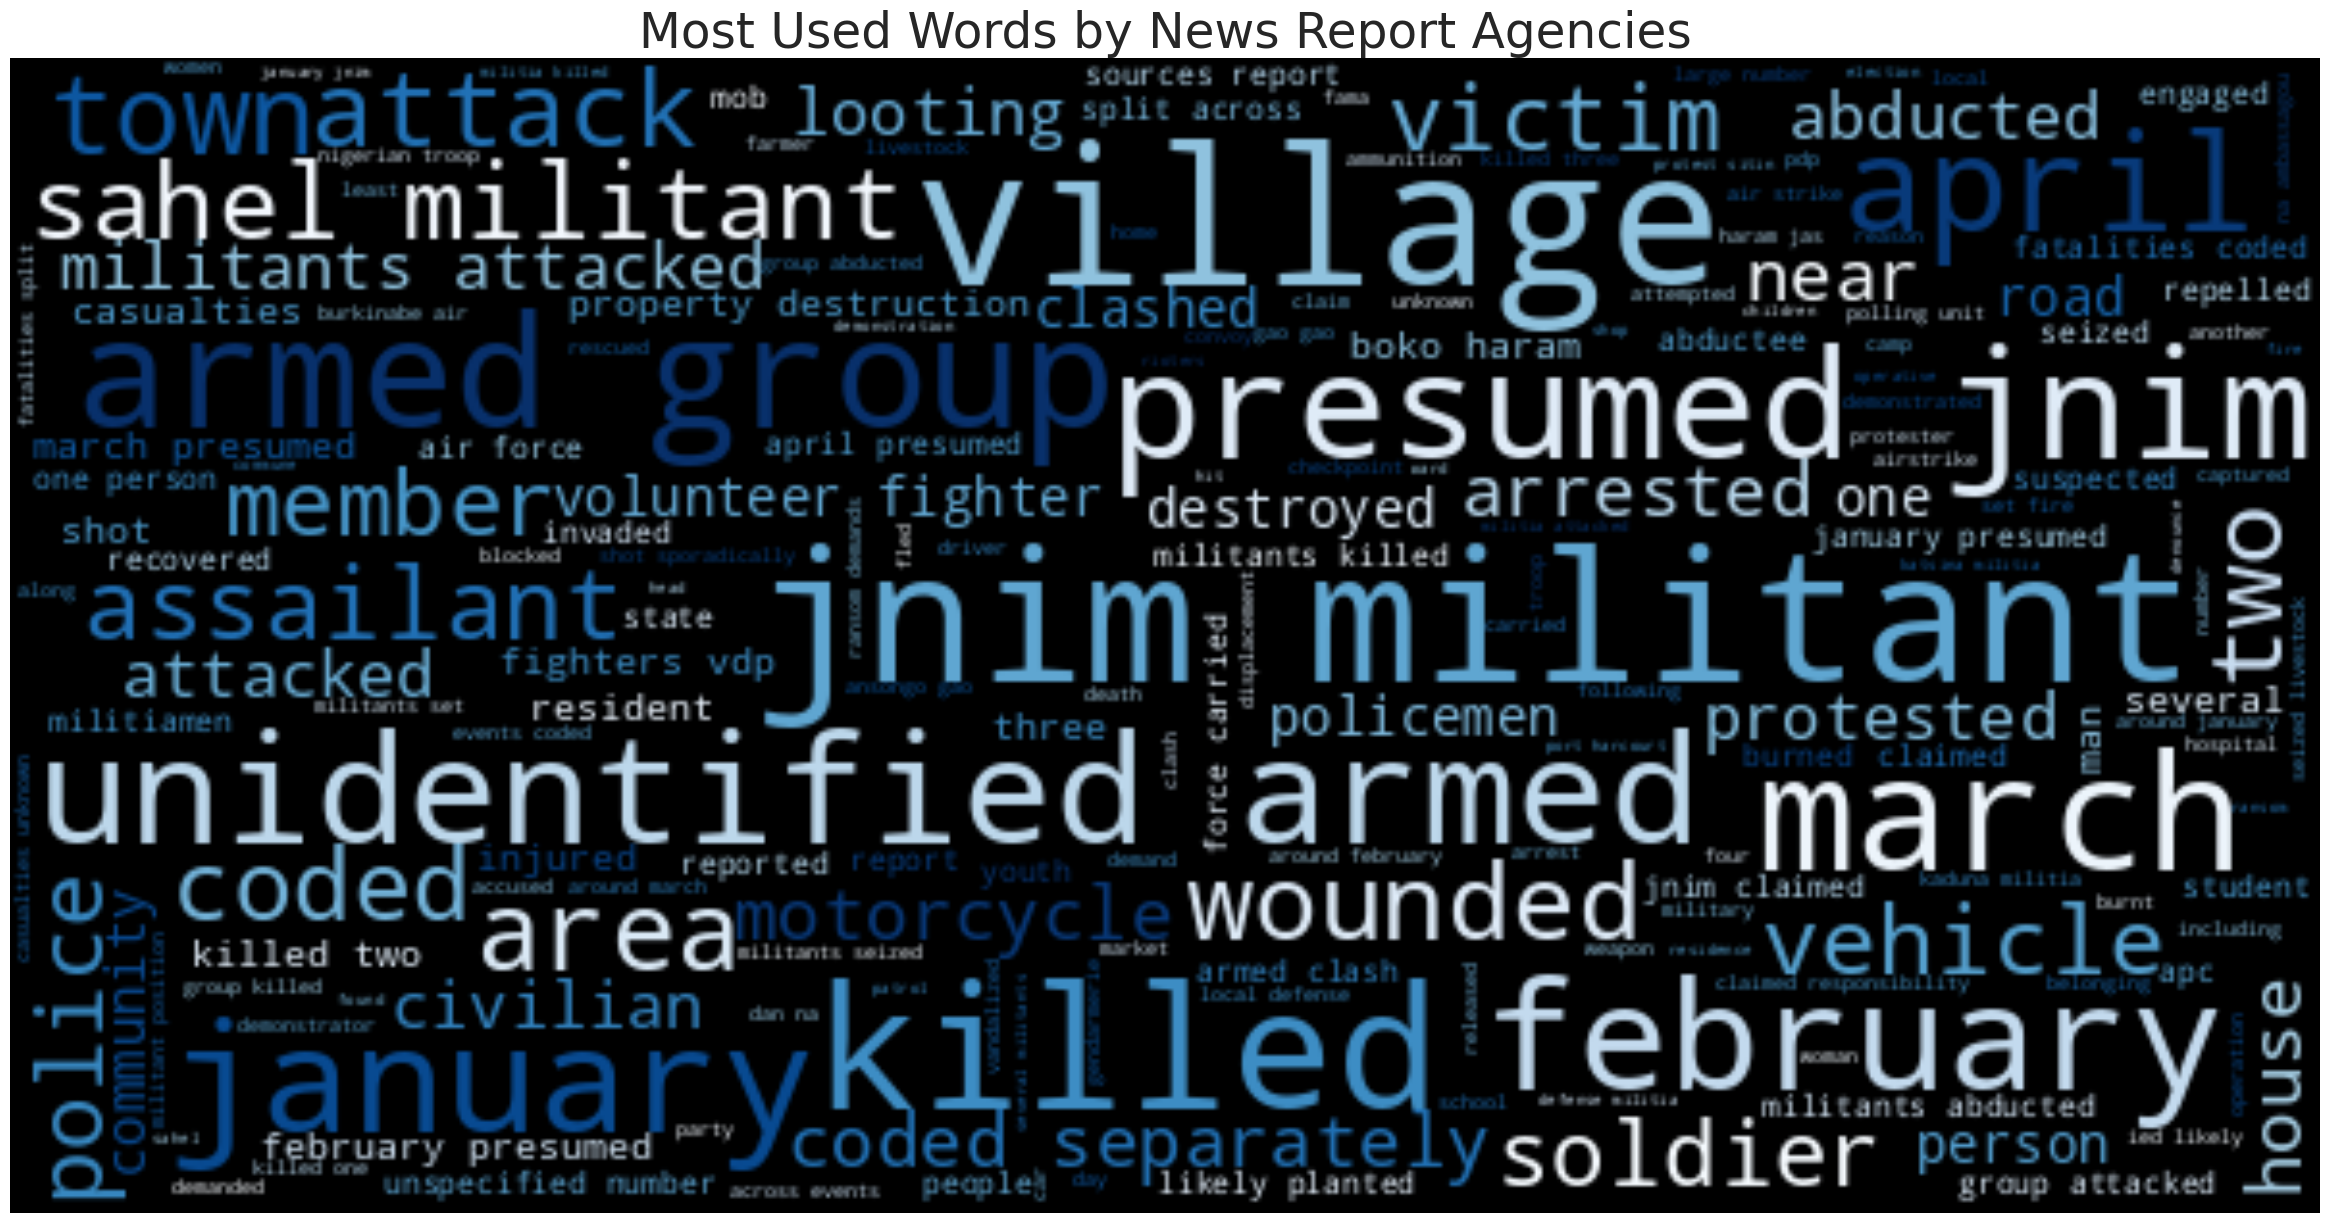

In [29]:
#clean data
import re
from nltk.corpus import stopwords
clean_1 = re.compile('[/(){}\[\]\|@,;]')
clean_2 = re.compile('[^0-9a-z #+_]')
def clean_text (text):
    text = text.lower()
    text = clean_1.sub(' ',text) # compile and replace those symbole by empty scpace
    text = clean_2.sub('',text)
    text_2 = [word.strip() for word in text.split() if not word in set(stopwords.words('english'))]
    new_text = ''
    for i in text_2:
        new_text +=i+' '
    text = new_text
    return text.strip()

# remove null value from column 'notes'
temp1 = acled23.dropna(subset=['notes'])
temp1['notes'] = temp1['notes'].apply(lambda x: " ".join(x.lower() for x in x.split()))
temp1['notes'] = temp1['notes'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

from wordcloud import WordCloud

wc = WordCloud(max_font_size=50, width=600, height=300,colormap='Blues')
wc.generate(' '.join(temp1['notes'].values))

plt.figure(figsize=(30,15))
plt.imshow(wc,interpolation="bilinear")
plt.title("Most Used Words by News Report Agencies", fontsize=35)
plt.axis("off")
plt.show() 


## Analysis: Most used words include unidentifird, armed, jnim, militant, village, group, militantand killed

### 6.3 Vader sentiment score and compound

In [30]:
import nltk 
nltk.download('vader_lexicon') 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()

acled23.dropna(inplace=True) 
acled23.iloc[0]['notes']
sid.polarity_scores(acled23.iloc[0]['notes']) 
acled23['scores']=acled23['notes'].apply(lambda review: sid.polarity_scores(review)) 
acled23['compound'] = acled23['scores'].apply(lambda d:d['compound'])
acled23.head() 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,notes,fatalities,tags,timestamp,year_extract,month,day of week,clean_notes,scores,compound
38,NIR29952,2023-04-27,2023,1,Political violence,riots,Mob violence,Rioters (Niger),Students (Niger),5,...,"On 27 April 2023, a number of youths (believed...",0,crowd size=no report,1683041276,2023,Apr,Thu,april number youths believed students burned v...,"{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'comp...",0.0772
108,CDI2849,2023-04-24,2023,1,Political violence,riots,Mob violence,Rioters (Ivory Coast),Vigilante Group (Ivory Coast),5,...,"On 24 April 2023, a resident mob from Djidji t...",0,crowd size=no report; women targeted: girls,1683041275,2023,Apr,Mon,april resident mob djidji tried throw stones f...,"{'neg': 0.2, 'neu': 0.755, 'pos': 0.045, 'comp...",-0.8481
266,CDI2848,2023-04-18,2023,2,Political violence,riots,Mob violence,Rioters (Ivory Coast),Microbes Youth Militia,5,...,"Around 18 April 2023 (week of), microbes attac...",0,crowd size=no report,1683041275,2023,Apr,Tue,around april week microbes attacked transport ...,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",-0.9360
274,CDI2847,2023-04-17,2023,1,Political violence,riots,Mob violence,Rioters (Ivory Coast),Microbes Youth Militia,5,...,"On 17 April 2023, microbes attacked Koumassi (...",0,crowd size=no report,1682441196,2023,Apr,Mon,april microbes attacked koumassi abidjian abid...,"{'neg': 0.191, 'neu': 0.718, 'pos': 0.092, 'co...",-0.4588
522,CDI2843,2023-04-10,2023,1,Political violence,riots,Mob violence,Rioters (Ivory Coast),Vigilante Group (Ivory Coast),5,...,"On 10 April 2023, a mob attacked a man armed w...",0,crowd size=no report,1681752016,2023,Apr,Mon,april mob attacked man armed machete aggressed...,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.8469


In [31]:
# Function to convert compound to negative, neutral and positive using cutoffs at -0.4 and 0.4
def classify(value):
    if value <= -0.4:
        return 'neg'
    elif value >= 0.4:
        return 'pos'
    else:
        return 'neu'

# Apply the function to create a new column
acled23['Classification'] = acled23['compound'].apply(lambda x: classify(x))

acled23.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,fatalities,tags,timestamp,year_extract,month,day of week,clean_notes,scores,compound,Classification
38,NIR29952,2023-04-27,2023,1,Political violence,riots,Mob violence,Rioters (Niger),Students (Niger),5,...,0,crowd size=no report,1683041276,2023,Apr,Thu,april number youths believed students burned v...,"{'neg': 0.0, 'neu': 0.957, 'pos': 0.043, 'comp...",0.0772,neu
108,CDI2849,2023-04-24,2023,1,Political violence,riots,Mob violence,Rioters (Ivory Coast),Vigilante Group (Ivory Coast),5,...,0,crowd size=no report; women targeted: girls,1683041275,2023,Apr,Mon,april resident mob djidji tried throw stones f...,"{'neg': 0.2, 'neu': 0.755, 'pos': 0.045, 'comp...",-0.8481,neg
266,CDI2848,2023-04-18,2023,2,Political violence,riots,Mob violence,Rioters (Ivory Coast),Microbes Youth Militia,5,...,0,crowd size=no report,1683041275,2023,Apr,Tue,around april week microbes attacked transport ...,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",-0.9360,neg
274,CDI2847,2023-04-17,2023,1,Political violence,riots,Mob violence,Rioters (Ivory Coast),Microbes Youth Militia,5,...,0,crowd size=no report,1682441196,2023,Apr,Mon,april microbes attacked koumassi abidjian abid...,"{'neg': 0.191, 'neu': 0.718, 'pos': 0.092, 'co...",-0.4588,neg
522,CDI2843,2023-04-10,2023,1,Political violence,riots,Mob violence,Rioters (Ivory Coast),Vigilante Group (Ivory Coast),5,...,0,crowd size=no report,1681752016,2023,Apr,Mon,april mob attacked man armed machete aggressed...,"{'neg': 0.225, 'neu': 0.775, 'pos': 0.0, 'comp...",-0.8469,neg


In [32]:
# Count number of pos, neg, and neu values
pos_count = acled23['Classification'].value_counts()['pos']
neg_count = acled23['Classification'].value_counts()['neg']
neu_count = acled23['Classification'].value_counts()['neu']

# Calculate percentages
total_count = pos_count + neg_count + neu_count
pos_pct = round((pos_count / total_count) * 100, 2)
neg_pct = round((neg_count / total_count) * 100, 2)
neu_pct = round((neu_count / total_count) * 100, 2)

# Print results
print("Positive: {} ({:.2f}%)".format(pos_count, pos_pct))
print("Negative: {} ({:.2f}%)".format(neg_count, neg_pct))
print("Neutral: {} ({:.2f}%)".format(neu_count, neu_pct))

KeyError: ignored

As expected for a crisis data, most of the compounds are negative (75%)

### 6.4 Tokenization
Tokenization is the process of breaking apart raw text into individual pieces (tokens) for further analysis. This process is important because the meaning of the text can be interpreted through analysis of the words present in the text.

In [ ]:
# Tokenize notes 
acled23_lem = acled23["clean_notes"].apply(lambda x : x.split())

In [ ]:
acled23_lem

### 6.5 Lemmatization 
Lemmatization is a process where we convert words to its root word. The advantage of this is, we get to reduce the total number of unique words in the dictionary. As a result, the number of columns in the document-word matrix (created by TfidfVectorizer in the next step) will be denser with lesser columns.

In [ ]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('punkt')

# Download the NLTK data (if not already downloaded)
nltk.download('wordnet')

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize text
def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Lemmatize each word using the WordNetLemmatizer
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a single string
    lemmatized_text = " ".join(lemmatized_words)

    return lemmatized_text

# Apply the lemmatize_text function to the 'notes' column
acled23["clean_notes"] = acled23["clean_notes"].apply(lemmatize_text)

# Print the updated DataFrame
acled23.head(5)


### 6.6 Vectorization
this convert the lemmatized words into numerical vectors, typically using methods such as TF-IDF or Bag of Words.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the lemmatized text to create a vector representation
vectorized_text = vectorizer.fit_transform(acled23["clean_notes"])

# Get the feature names as a list
feature_names = vectorizer.get_feature_names_out()

# Convert the vectorized text to a DataFrame
df_vectorized = pd.DataFrame(vectorized_text.toarray(), columns=feature_names)

# Print the vectorized DataFrame
print(df_vectorized)

### 6.7 Logistic Regression
Using logistic regression to predict the event_type from the data

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_text, acled23["event_type"], test_size=0.3, random_state=42)

# Create a logistic regression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)


Accuracy of 91% from train data and test data

## **7. Conclusion**

From the analysis,

1. Nigeria, Burkina Faso and Mali are the top 3 countries for crisis events in West Africa accounting for a combined 78% of all events
2. Nigeria, Burkina Faso and Mali are also the top 3 countries for fatalities West Africa accounting for a combined 78% of all events
3. Fatalities are randomly distributed throughout the week and the year
4. Battles and violence cause the largest number of fatalities
5. Using vader, most of the notes were determined to negative sentiments
6. Standard NLP methods such as lemmatization, tokenization and vectorization have been successfully applied
7. A logistic regression to predict event_type yielded an accuracy of 79%